# Feed Forward Neural Networks (FFNNs)

This notebook contains examples of using FFNNs for classification and regression.

In [21]:
import keras
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pprint import pprint
from sklearn import datasets
import matplotlib.pyplot as plt

## Dataset
The dataset used here is desscribed below:
    
```
There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
```

Information
```
Classes - 40
Samples total - 400
Dimensionality - 4096
Features - real, between 0 and 1
```

In [2]:
import sklearn
oliv_faces = datasets.fetch_olivetti_faces()

In [192]:
"""
First split is 80/20 for BEFORE/test from FULL dataset

The validation set is specified within the MLP:
    The second is 80/20 for train/validate from BEFORE dataset
"""
X_train, X_test, y_train, y_test = train_test_split(list(oliv_faces.data), list(oliv_faces.target), test_size=0.20, random_state=42)

In [193]:
num_train = len(y_train)
num_validate = len(y_validate)
num_test = len(y_test)
print(f"The number of training samples is: {num_train}")
print(f"The number of validation samples is: {num_validate}")
print(f"The number of testing samples is: {num_test}")

The number of training samples is: 320
The number of validation samples is: 64
The number of testing samples is: 80


# Creating Models

This section creates different types of FFNNs

In [194]:
class FFNN:
    
    def __init__(self, num_hidden_neurons=(100,), 
                       activation_fun="relu", 
                       solver="adam", 
                       l2_penalty=0.002, 
                       validation_fraction=0.2):
        self.num_hidden_neurons = num_hidden_neurons
        self.validation_fraction = validation_fraction
        self.num_hidden_layers = len(num_hidden_neurons)
        self.activation_fun = activation_fun
        self.solver = solver
        self.l2_penalty = l2_penalty
        self.epochs = None

    def train(self, X_train, y_train, num_epochs=100) -> int:
        """
        This method trains the model
        """
        self.epochs = num_epochs
        self.model = MLPClassifier(random_state=1,
                                   validation_fraction = self.validation_fraction,
                                   hidden_layer_sizes = self.num_hidden_neurons,
                                   activation=self.activation_fun,
                                   max_iter=num_epochs, 
                                   alpha=self.l2_penalty,
                                   solver=self.solver,
                                   verbose=False
                                   )
        self.model.fit(X_train, y_train)
        return 0
        
    def predict(self, X_unkown) -> list:
        """
        This method is used for testing the model
        """
        return self.model.predict(X_unkown)

    def score(self, x_test, y_test):
        """
        This returns the score for the models
        """
        return self.model.score(X_test, y_test)
    
    def get_full_name(self):
        """
        returns more descriptive name
        """
        name = ""
        name += f"num hidden neurons: {self.num_hidden_neurons} \n"
        name += f"num hidden layers: {self.num_hidden_layers} \n"
        name += f"Activation function: {self.activation_fun} \n"
        if self.epochs:
            name += f"Epochs: {self.epochs} \n"
        return name
        
        

In [195]:
model_0 = FFNN(num_hidden_neurons=(10,), activation_fun="relu")
model_1 = FFNN(num_hidden_neurons=(50,), activation_fun="relu")
model_2 = FFNN(num_hidden_neurons=(100,), activation_fun="relu")
model_3 = FFNN(num_hidden_neurons=(100, 100), activation_fun="tanh")
model_4 = FFNN(num_hidden_neurons=(100, 100),  activation_fun="logistic")
model_5 = FFNN(num_hidden_neurons=(100, 100), activation_fun="relu")
model_6 = FFNN(num_hidden_neurons=(1000,), activation_fun="relu")
model_7 = FFNN(num_hidden_neurons=(1000, 1000), activation_fun="tanh")
model_8 = FFNN(num_hidden_neurons=(1000, 1000), activation_fun="logistic")
model_9 = FFNN(num_hidden_neurons=(1000, 1000), activation_fun="relu")

In [196]:
MODELS = {"Model 0" : model_1,
          "Model 1" : model_1,
          "Model 2" : model_2,
          "Model 3" : model_3,
          "Model 4" : model_4,
          "Model 5" : model_5,
          "Model 6" : model_6,
          "Model 7" : model_7,
          "Model 8" : model_8,
          "Model 9" : model_9
         }

### Training Models

In [197]:
# Train all of the models
for model_name in MODELS.keys():
    print(f"Training {model_name}")
    MODELS[model_name].train(X_train, y_train, num_epochs=500)

Training Model 0


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Model 1


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Model 2


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Model 3
Training Model 4


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Model 5
Training Model 6
Training Model 7
Training Model 8
Training Model 9


### Testing Models

In [198]:
scores = []
confusion_matrices = []
for model_name in MODELS.keys():
    prediction = MODELS[model_name].predict(X_test)
    score = MODELS[model_name].score(X_test, y_test)
    scores.append(score)
    confusion_matrices.append(confusion_matrix(y_test, prediction))

### Plotting Results

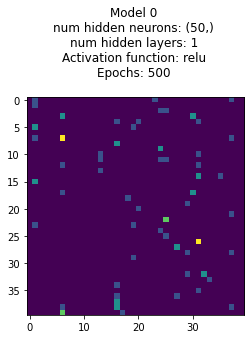

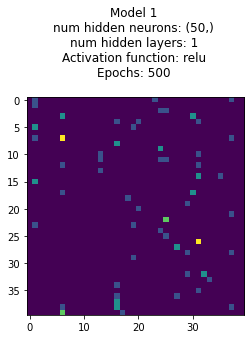

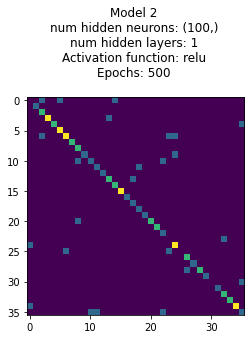

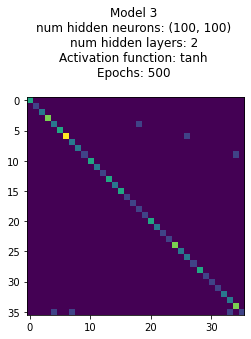

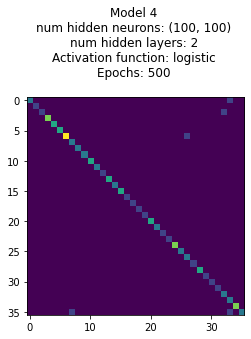

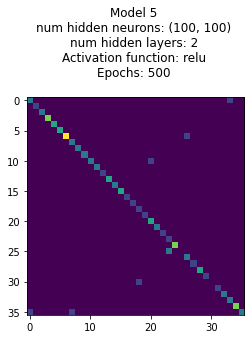

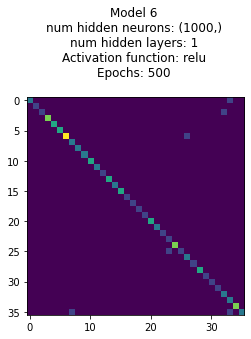

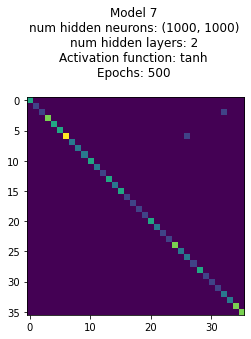

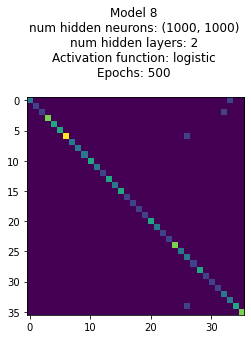

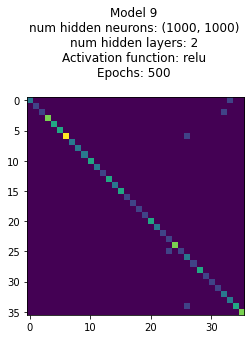

In [199]:
names = [f"{name} \n"+model.get_full_name() for name, model in MODELS.items()]
for index, mtx in enumerate(confusion_matrices):
    plt.imshow(mtx)
    plt.title(names[index])
    plt.show()

([<matplotlib.axis.XTick at 0x7f9756ca14d0>,
 [Text(0, 0, 'Model 0 \nnum hidden neurons: (50,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 500 \n'),
  Text(1, 0, 'Model 1 \nnum hidden neurons: (50,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 500 \n'),
  Text(2, 0, 'Model 2 \nnum hidden neurons: (100,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 500 \n'),
  Text(3, 0, 'Model 3 \nnum hidden neurons: (100, 100) \nnum hidden layers: 2 \nActivation function: tanh \nEpochs: 500 \n'),
  Text(4, 0, 'Model 4 \nnum hidden neurons: (100, 100) \nnum hidden layers: 2 \nActivation function: logistic \nEpochs: 500 \n'),
  Text(5, 0, 'Model 5 \nnum hidden neurons: (100, 100) \nnum hidden layers: 2 \nActivation function: relu \nEpochs: 500 \n'),
  Text(6, 0, 'Model 6 \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 500 \n'),
  Text(7, 0, 'Model 7 \nnum hidden neurons: (1000, 1000) \nnum hidden layers: 2 \nActi

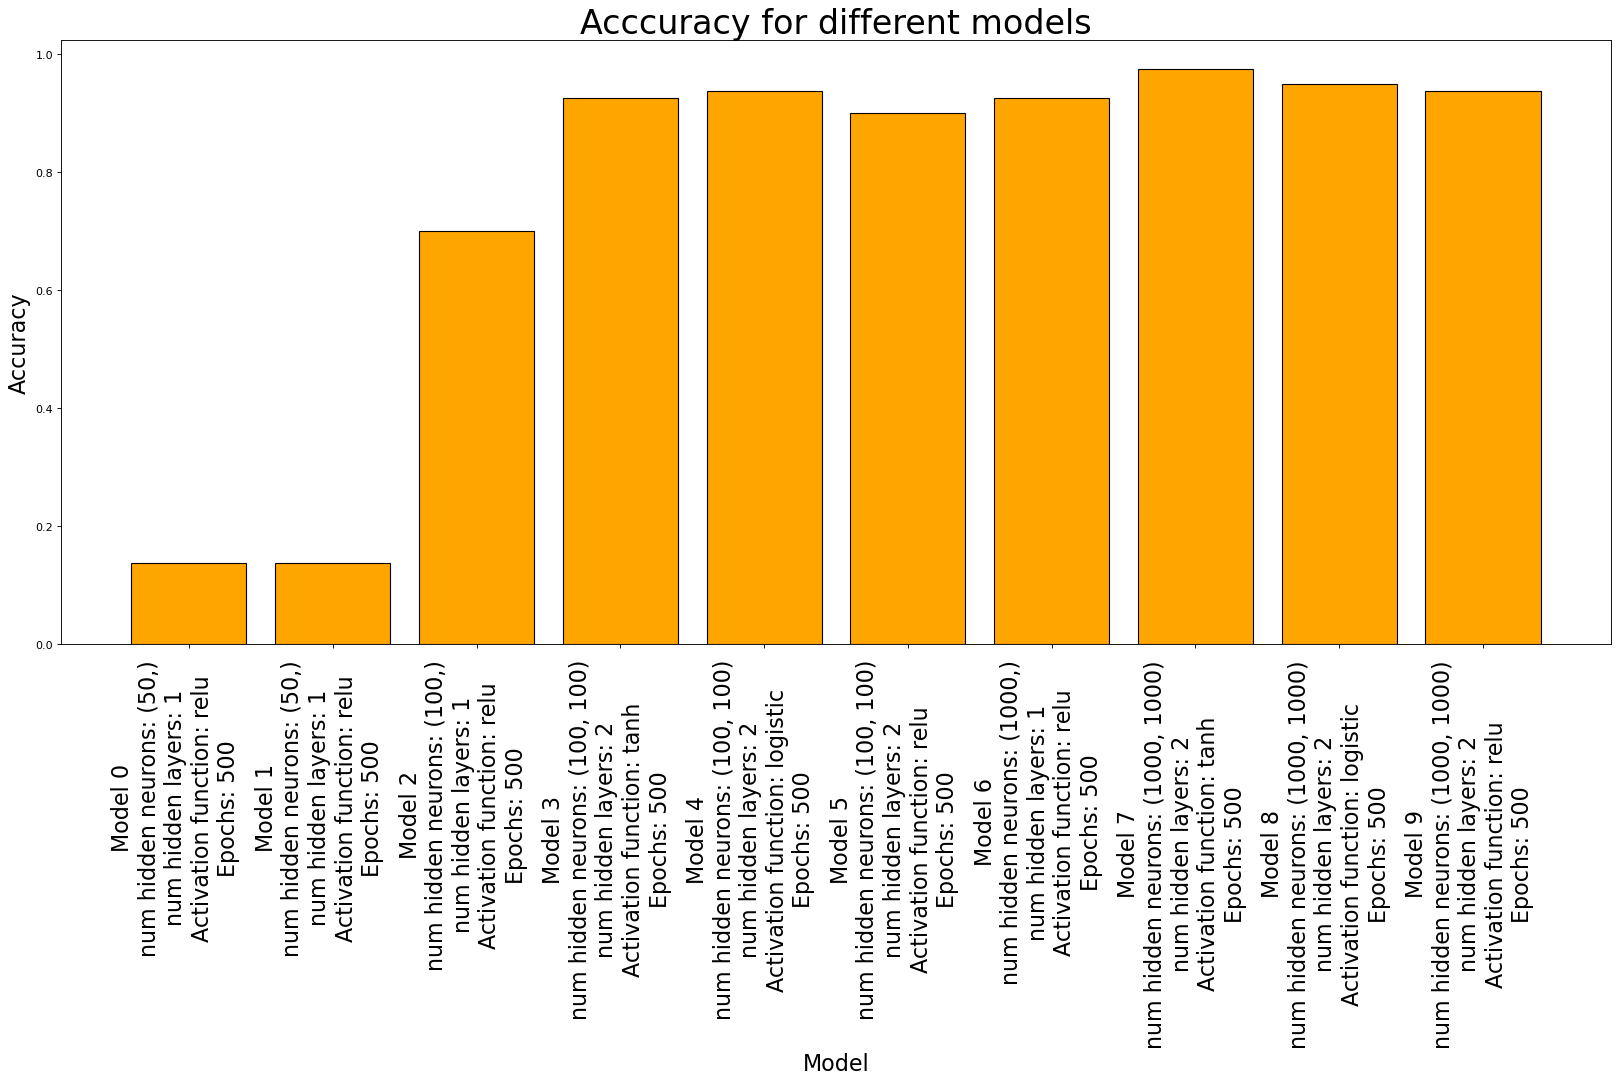

In [200]:
plt.figure(figsize=(25, 10), dpi=80)
plt.bar(range(len(scores)), scores, color='orange', edgecolor='black')
plt.title("Acccuracy for different models", size=30)
plt.xlabel("Model", size=20)
plt.ylabel("Accuracy", size=20)
names = [f"{name} \n"+model.get_full_name() for name, model in MODELS.items()]
plt.xticks(range(len(scores)), names, rotation='vertical', size=20)

### Creating 25%, 50%, 75%, 100% train

In [201]:
train_paritions = {}
for train_percentage in [0.25, 0.5, 0.75, 1]:
    train_paritions[str(train_percentage * 100)+"%"] = (X_train[:int(len(X_train)*train_percentage)], 
                                                        y_train[0:int(len(y_train)*train_percentage)])

In [202]:
model_chosen = FFNN(num_hidden_neurons=(100, 100), activation_fun="relu")

In [203]:
for train_name, train_set in train_paritions.items():
    print(f"{train_name} - {len(train_set[0])}")

25.0% - 80
50.0% - 160
75.0% - 240
100% - 320


In [204]:
MODELS_2 = {}
model_number = 0
for subset_name, train_subset in train_paritions.items():
    X_train_subset, y_train_subset = train_subset
    for epoch_amount in [50, 100, 1000]:
        print(f"Model_{model_number} Train w. {subset_name}%")
        model_chosen = FFNN(num_hidden_neurons=(1000,), activation_fun="relu")
        model_chosen.train(X_train_subset, y_train_subset, epoch_amount)
        MODELS_2[f"Model_{model_number} Train w. {subset_name}%"] = model_chosen
        model_number += 1

Model_0 Train w. 25.0%%
Model_1 Train w. 25.0%%
Model_2 Train w. 25.0%%
Model_3 Train w. 50.0%%
Model_4 Train w. 50.0%%
Model_5 Train w. 50.0%%
Model_6 Train w. 75.0%%


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model_7 Train w. 75.0%%


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model_8 Train w. 75.0%%
Model_9 Train w. 100%%


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model_10 Train w. 100%%


/Users/dreyceyalbin/miniconda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model_11 Train w. 100%%


### Testing

In [205]:
scores = []
confusion_matrices = []
for model_name in MODELS_2.keys():
    prediction = MODELS_2[model_name].predict(X_test)
    score = MODELS_2[model_name].score(X_test, y_test)
    scores.append(score)
    confusion_matrices.append(confusion_matrix(y_test, prediction))

### Plotting

[[0 3 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 2 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]]


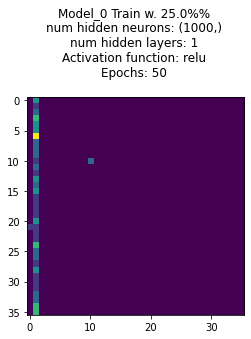

[[0 3 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 2 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]]


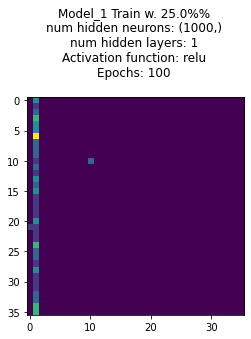

[[0 3 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 2 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]]


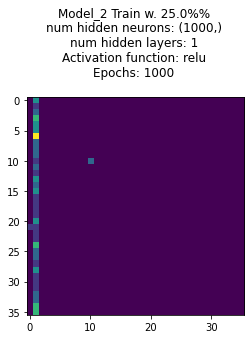

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


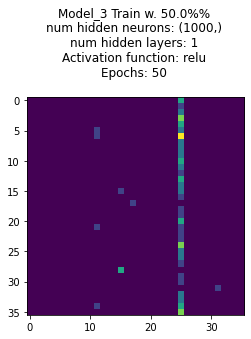

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


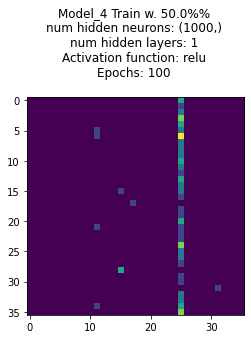

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


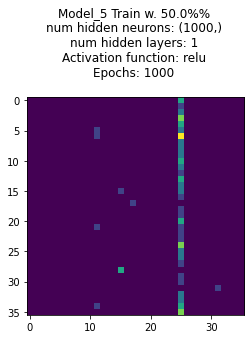

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [1 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


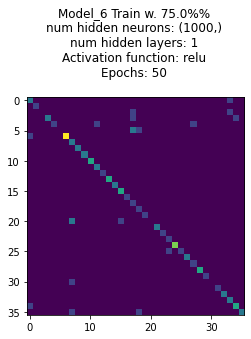

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


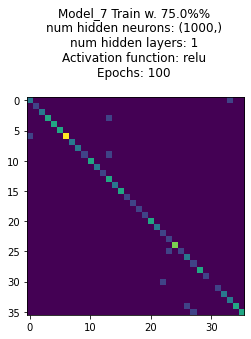

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


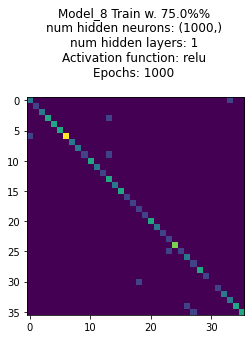

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 1 ... 0 0 2]]


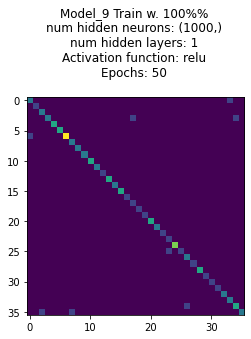

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 1 0 2]]


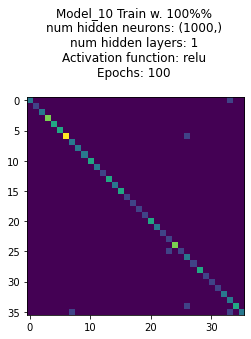

[[2 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 0 2]]


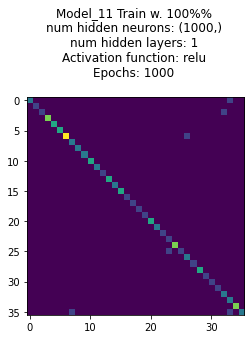

In [206]:
names = [f"{name} \n"+model.get_full_name() for name, model in MODELS_2.items()]
for index, mtx in enumerate(confusion_matrices):
    print(mtx)
    plt.imshow(mtx)
    plt.title(names[index])
    plt.show()

([<matplotlib.axis.XTick at 0x7f9775943710>,
 [Text(0, 0, 'Model_0 Train w. 25.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 50 \n'),
  Text(1, 0, 'Model_1 Train w. 25.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 100 \n'),
  Text(2, 0, 'Model_2 Train w. 25.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 1000 \n'),
  Text(3, 0, 'Model_3 Train w. 50.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 50 \n'),
  Text(4, 0, 'Model_4 Train w. 50.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 100 \n'),
  Text(5, 0, 'Model_5 Train w. 50.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \nEpochs: 1000 \n'),
  Text(6, 0, 'Model_6 Train w. 75.0%% \nnum hidden neurons: (1000,) \nnum hidden layers: 1 \nActivation function: relu \n

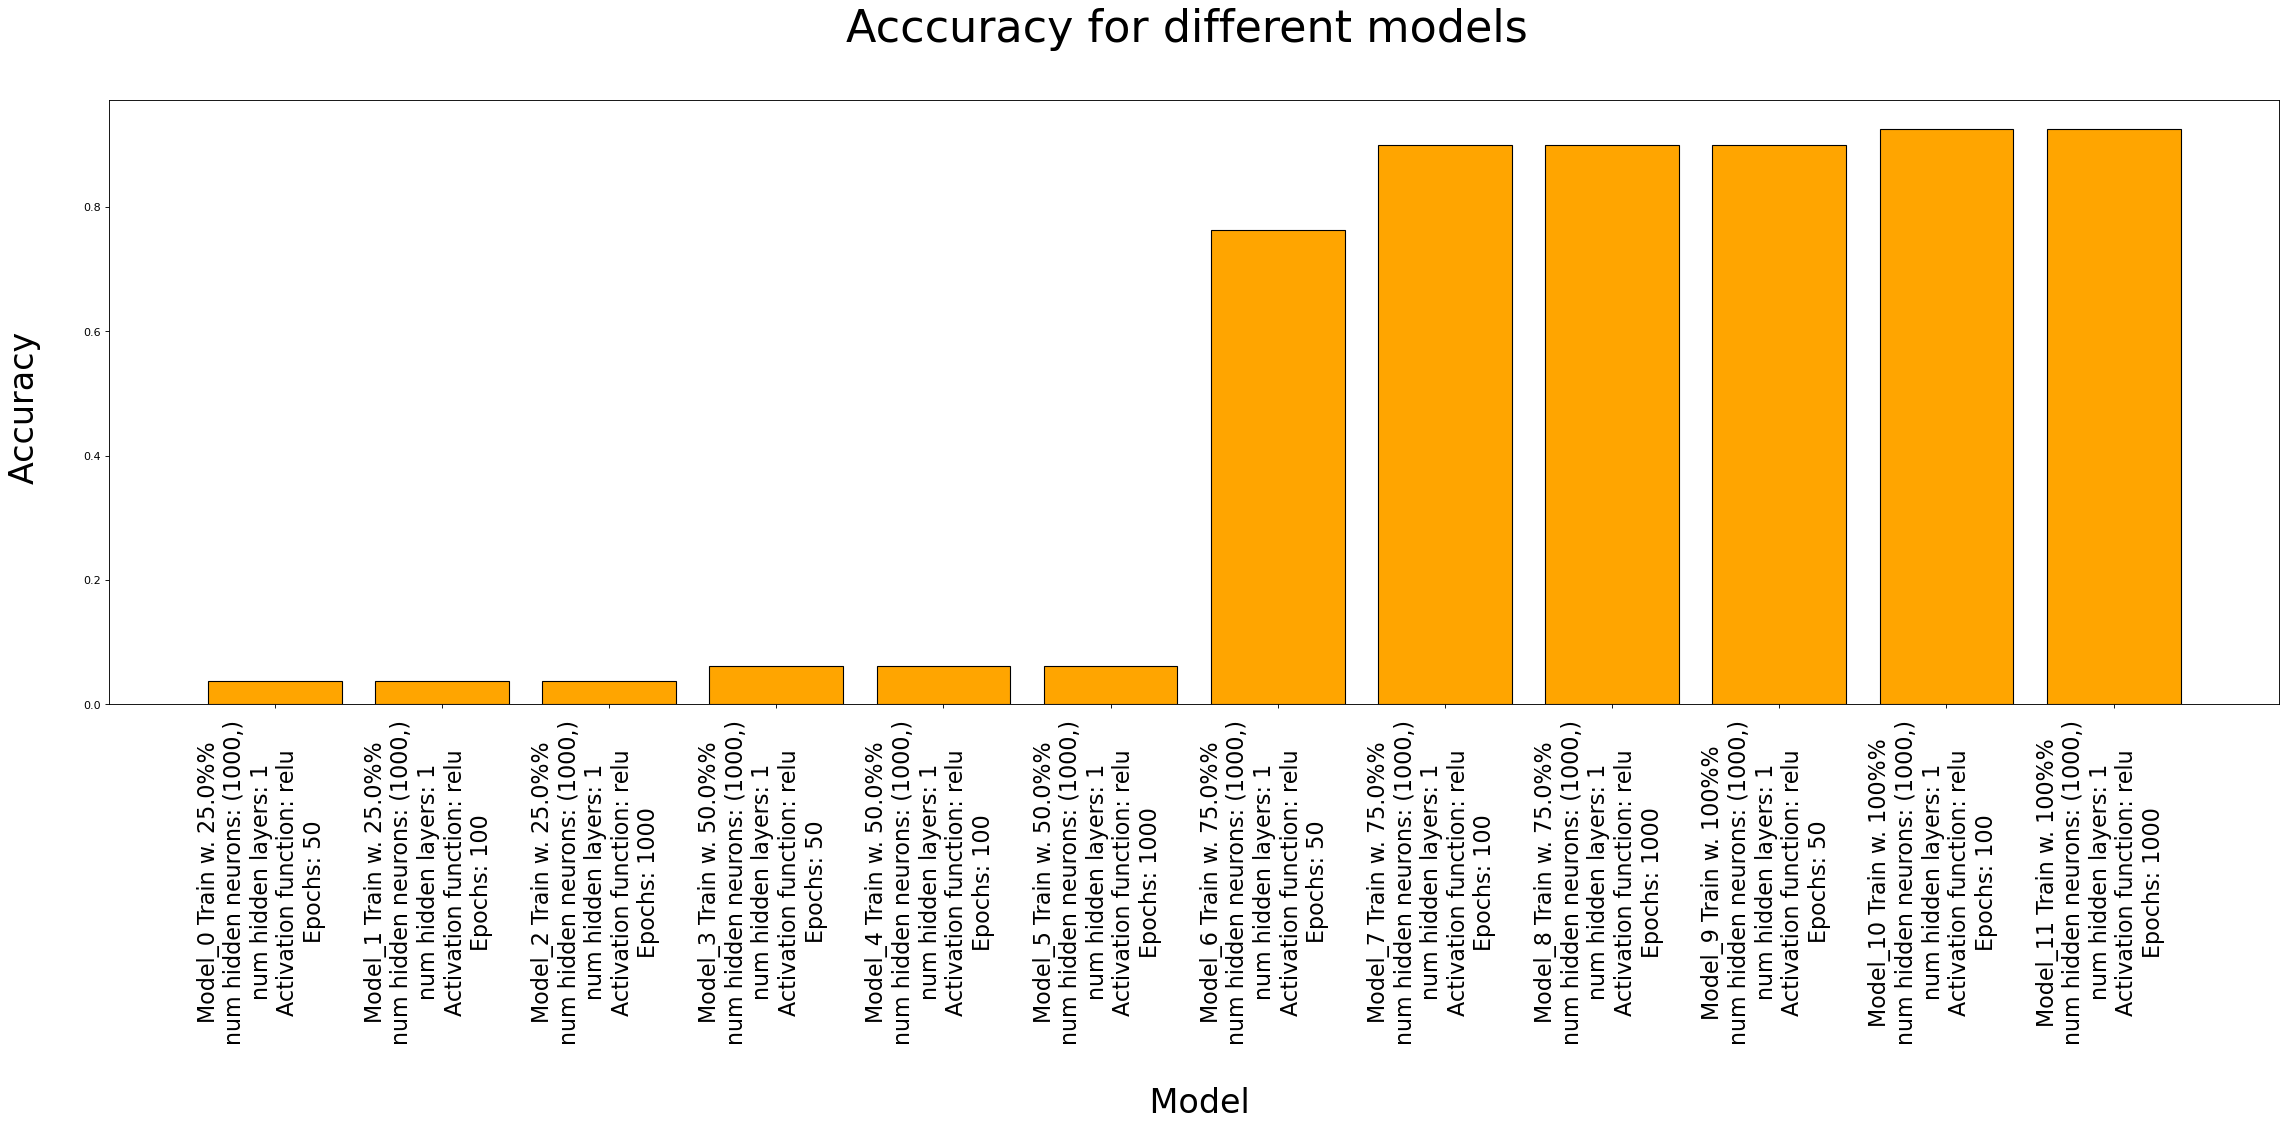

In [207]:
plt.figure(figsize=(35, 10), dpi=80)
plt.bar(range(len(scores)), scores, color='orange', edgecolor='black')
plt.title("Acccuracy for different models \n", size=40)
plt.xlabel("\n Model", size=30)
plt.ylabel("Accuracy \n", size=30)
names = [f"{name} \n"+model.get_full_name() for name, model in MODELS_2.items()]
plt.xticks(range(len(scores)), names, rotation='vertical', size=20)